# SENTIMENT ANALYSIS

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [4]:
pip install tweepy

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [8]:
consumer_key= 'awwBFvTGsdHBKMhtxFdcY4sqU'
consumer_secret= 'GSJxMjBAQN3dkRRugNpbz83RTNSvydwGrN1G40Ipqjr3Pl70vX'
access_token= '1680280310-0UaI6yYLb9yHr2VLd9xC0e1RFqm2DBe9GxpJFVk'
access_token_secret= 'BRwZ9rXANAbDKSOWyWraYAA53mX5u2ZJUewW9uqPSyK5A'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [10]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [11]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [12]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.2,
 TextBlob("Melting ice in Greenland could disrupt the Gulf Stream and make Europe much colder and drier scientists fear"))

In [13]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]
[0.35,
 'CLIMATE change causing wildfires to become more intense GlobalWarming climatechange']

[0.35,
 'CLIMATE change causing wildfires to become more intense GlobalWarming climatechange']

In [14]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.200000,Melting ice in Greenland could disrupt the Gul...
1,-0.200000,Make Earth green againCombating climate change...
2,0.600000,Taking the mandate of climate change into our ...
3,0.250000,POTUS took the first step towards restoring US...
4,0.166667,To put it simply to address climate change we ...


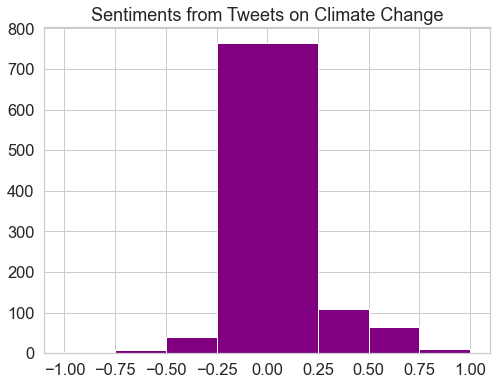

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [16]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

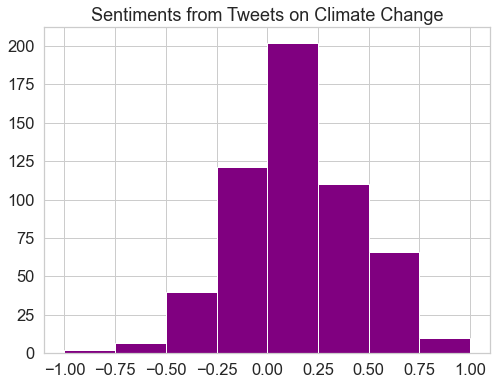

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [18]:
search_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Be adventurous Get down to earth by trekking and Camping at just 1700camping tentlife Munnar"),
 TextBlob("Whos looking forward to going camping this summercamping greatoutdoors camp rv tents campfire"),
 TextBlob("Whos looking forward to going camping this summercamping greatoutdoors camp rv tents campfire"),
 TextBlob("Whos looking forward to going camping this summercamping greatoutdoors camp rv tents campfire"),
 TextBlob("Whos looking forward to going camping this summercamping greatoutdoors camp rv tents campfire")]

In [19]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,0.172222,Be adventurous Get down to earth by trekking a...
9,-0.400000,As a CampFire survivor and someone with stage ...
20,0.100000,Yangshuo Sugar House in Guangxi planned an Art...
23,0.500000,Not so much a writers shed as a sleepers shed ...
28,0.155556,All welcome gooutside Burning black locust bla...


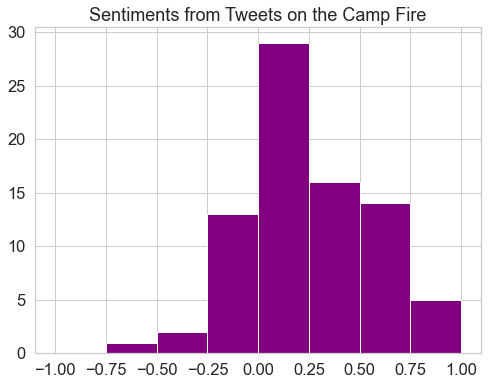

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()